# **ANN Assignment 1 by ANKIT SHARMA (24/AFI/05)**

# **Extracting Features from MNIST Dataset**

In [ ]:
import h5py

def inspect_h5_file(file_path='/content/MNIST_Subset.h5'):
    # Open the file in read mode
    with h5py.File('/content/MNIST_Subset.h5', 'r') as f:
        # List all groups and datasets
        for key in f.keys():
            print(f"Key: {key}, Shape: {f[key].shape}, Datatype: {f[key].dtype}")

# Inspect the file
file_path = '/content/MNIST_Subset.h5'
inspect_h5_file('/content/MNIST_Subset.h5')

Key: X, Shape: (14251, 28, 28), Datatype: uint8
Key: Y, Shape: (14251,), Datatype: uint8


# **Forward & Backward Propagation using Sigmoid at hidden layer and Softmax at output layer**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from scipy.special import softmax
import h5py
from sklearn.model_selection import train_test_split

# Function to load MNIST data from an HDF5 file
def load_mnist(filepath="/content/MNIST_Subset.h5"):
    with h5py.File(filepath, 'r') as f:
        X = f['X'][:]
        Y = f['Y'][:]
    return X, Y

# Function to initialize the network's weights and biases
def initialize_network(layer_sizes):
    np.random.seed(10)
    weights = []
    biases = []
    for i in range(len(layer_sizes) - 1):
        # Initialize weights with small random values
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.1)
        # Initialize biases with zeros
        biases.append(np.zeros((1, layer_sizes[i + 1])))
    return weights, biases

# Function for forward propagation through the network
def forward_propagation(X, weights, biases):
    X = X.reshape(X.shape[0], -1)  # Flatten the input
    activations = [X]
    Zs = []
    for W, b in zip(weights[:-1], biases[:-1]):
        Z = np.dot(activations[-1], W) + b  # Linear step
        A = sigmoid(Z)  # Activation step
        Zs.append(Z)
        activations.append(A)
    Z = np.dot(activations[-1], weights[-1]) + biases[-1]
    A = softmax(Z, axis=1)  # Softmax for the output layer
    Zs.append(Z)
    activations.append(A)
    return activations, Zs

# Function for backward propagation through the network
def backward_propagation(y, activations, Zs, weights, l2_lambda=0.01):
    m = y.shape[0]
    y_one_hot = np.eye(10)[y]  # One-hot encode the labels
    dZ = activations[-1] - y_one_hot  # Derivative of the loss with respect to Z
    dWs = []
    dbs = []
    for i in reversed(range(len(weights))):
        dW = np.dot(activations[i].T, dZ) / m + l2_lambda * weights[i] / m  # Gradient of weights
        db = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient of biases
        dWs.insert(0, dW)
        dbs.insert(0, db)
        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * activations[i] * (1 - activations[i])  # Derivative of the activation function
    return dWs, dbs

# Function to update the network's weights and biases
def update_weights(weights, biases, dWs, dbs, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * dWs[i]  # Update weights
        biases[i] -= learning_rate * dbs[i]  # Update biases
    return weights, biases

# Function to train the network with validation
def train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes, learning_rate=0.1, epochs=500, l2_lambda=0.01):
    weights, biases = initialize_network(layer_sizes)
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        activations, Zs = forward_propagation(X_train, weights, biases)  # Forward pass
        dWs, dbs = backward_propagation(y_train, activations, Zs, weights, l2_lambda)  # Backward pass
        weights, biases = update_weights(weights, biases, dWs, dbs, learning_rate)  # Update weights and biases

        train_predictions = np.argmax(activations[-1], axis=1)  # Predictions for training data
        train_accuracy = np.mean(train_predictions == y_train)  # Training accuracy
        train_accuracies.append(train_accuracy)

        val_activations, _ = forward_propagation(X_val, weights, biases)  # Forward pass for validation data
        val_predictions = np.argmax(val_activations[-1], axis=1)  # Predictions for validation data
        val_accuracy = np.mean(val_predictions == y_val)  # Validation accuracy
        val_accuracies.append(val_accuracy)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

        # Learning rate decay
        if epoch % 100 == 0 and epoch != 0:
            learning_rate *= 0.9

    return weights, biases, train_accuracies, val_accuracies

# Function to plot training and validation accuracies over epochs
def plot_accuracies(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy over Epochs')
    plt.show()

# Load data from the specified file path
file_path = '/content/MNIST_Subset.h5'
X, Y = load_mnist(file_path)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=10)

# Define layer sizes for different configurations
layer_sizes_1 = [784, 100, 10]
layer_sizes_2 = [784, 100, 50, 50, 10]

# Train the network with 1 hidden layer and track accuracies
print(f"Accuracy for 1 hidden layer:")
weights_1, biases_1, train_accuracies_1, val_accuracies_1 = train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes_1)

# Train the network with 3 hidden layers and track accuracies
print(f"Accuracy for 3 hidden layers:")
weights_2, biases_2, train_accuracies_2, val_accuracies_2 = train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes_2)

Accuracy for 1 hidden layer:
Epoch 0, Training Accuracy: 0.0008421052631578948, Validation Accuracy: 0.5722705585181027
Epoch 10, Training Accuracy: 0.8662456140350877, Validation Accuracy: 0.8718776312096548
Epoch 20, Training Accuracy: 0.9153684210526316, Validation Accuracy: 0.9068200954252035
Epoch 30, Training Accuracy: 0.9285614035087719, Validation Accuracy: 0.9174852652259332
Epoch 40, Training Accuracy: 0.9344561403508772, Validation Accuracy: 0.9238001683974179
Epoch 50, Training Accuracy: 0.9390877192982456, Validation Accuracy: 0.9287117597530171
Epoch 60, Training Accuracy: 0.9431578947368421, Validation Accuracy: 0.9322200392927309
Epoch 70, Training Accuracy: 0.9472280701754386, Validation Accuracy: 0.9350266629245019
Epoch 80, Training Accuracy: 0.9487719298245614, Validation Accuracy: 0.9367106371035644
Epoch 90, Training Accuracy: 0.9500350877192982, Validation Accuracy: 0.9365703059219759
Epoch 100, Training Accuracy: 0.9528421052631579, Validation Accuracy: 0.939236

# **Graph Plot of Accuracy by Sigmoid & Softmax**

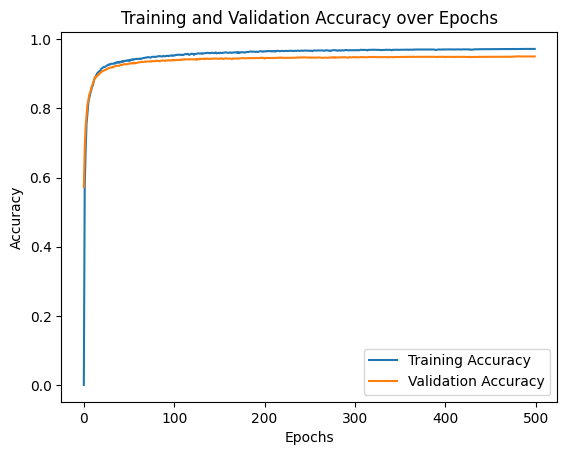

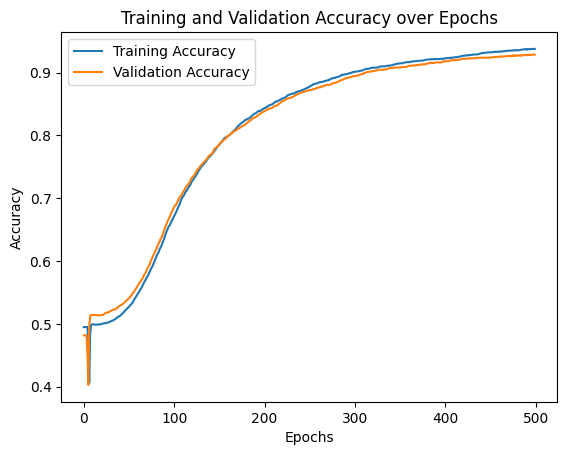

In [ ]:
# Plot the accuracies for both configurations
plot_accuracies(train_accuracies_1, val_accuracies_1)
plot_accuracies(train_accuracies_2, val_accuracies_2)

# **Saving weights of the model**

In [ ]:
import pickle
#saving weights of the model
def save_model(weights, biases, filename):
    with open(filename, 'wb') as f:
        pickle.dump((weights, biases), f)

save_model(weights_1, biases_1, 'model_1_hidden_layer.pkl')
save_model(weights_2, biases_2, 'model_3_hidden_layers.pkl')

# **Forward & Backward Propagation using ReLU at hidden layer and Softmax at output layer**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import h5py
from sklearn.model_selection import train_test_split

# Function to load MNIST data from an HDF5 file
def load_mnist(filepath="/content/MNIST_Subset.h5"):
    with h5py.File(filepath, 'r') as f:
        X = f['X'][:]
        Y = f['Y'][:]
    return X, Y

# Function to initialize the network's weights and biases
def initialize_network(layer_sizes):
    np.random.seed(10)
    weights = []
    biases = []
    for i in range(len(layer_sizes) - 1):
        # Initialize weights with He initialization
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * np.sqrt(2. / layer_sizes[i]))
        # Initialize biases with zeros
        biases.append(np.zeros((1, layer_sizes[i + 1])))
    return weights, biases

# ReLU activation function
def relu(Z):
    return np.maximum(0, Z)

# Derivative of ReLU activation function
def relu_derivative(Z):
    return Z > 0

# Function for forward propagation through the network
def forward_propagation(X, weights, biases, dropout_rate=0.5):
    X = X.reshape(X.shape[0], -1)  # Flatten the input
    activations = [X]
    Zs = []
    for W, b in zip(weights[:-1], biases[:-1]):
        Z = np.dot(activations[-1], W) + b  # Linear step
        A = relu(Z)  # Activation step
        # Apply dropout
        D = np.random.rand(*A.shape) < dropout_rate
        A = A * D
        A = A / dropout_rate
        Zs.append(Z)
        activations.append(A)
    Z = np.dot(activations[-1], weights[-1]) + biases[-1]
    A = softmax(Z, axis=1)  # Softmax for the output layer
    Zs.append(Z)
    activations.append(A)
    return activations, Zs

# Function for backward propagation through the network
def backward_propagation(y, activations, Zs, weights, dropout_rate=0.5):
    m = y.shape[0]
    y_one_hot = np.eye(10)[y]  # One-hot encode the labels
    dZ = activations[-1] - y_one_hot  # Derivative of the loss with respect to Z
    dWs = []
    dbs = []
    for i in reversed(range(len(weights))):
        dW = np.dot(activations[i].T, dZ) / m  # Gradient of weights
        db = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient of biases
        dWs.insert(0, dW)
        dbs.insert(0, db)
        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dA = dA * (activations[i] > 0)  # ReLU derivative
            # Apply dropout
            dA = dA * (np.random.rand(*activations[i].shape) < dropout_rate)
            dA = dA / dropout_rate
            dZ = dA
    return dWs, dbs

# Function to update the network's weights and biases
def update_weights(weights, biases, dWs, dbs, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * dWs[i]  # Update weights
        biases[i] -= learning_rate * dbs[i]  # Update biases
    return weights, biases

# Function to train the network with validation
def train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes, learning_rate=0.1, epochs=500, dropout_rate=0.5):
    weights, biases = initialize_network(layer_sizes)
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Forward pass
        activations, Zs = forward_propagation(X_train, weights, biases, dropout_rate)
        # Backward pass
        dWs, dbs = backward_propagation(y_train, activations, Zs, weights, dropout_rate)
        # Update weights and biases
        weights, biases = update_weights(weights, biases, dWs, dbs, learning_rate)

        # Calculate training accuracy
        train_predictions = np.argmax(activations[-1], axis=1)
        train_accuracy = np.mean(train_predictions == y_train)
        train_accuracies.append(train_accuracy)

        # Calculate validation accuracy
        val_activations, _ = forward_propagation(X_val, weights, biases, dropout_rate)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == y_val)
        val_accuracies.append(val_accuracy)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    return weights, biases, train_accuracies, val_accuracies

# Function to plot training and validation accuracies over epochs
def plot_accuracies(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy over Epochs')
    plt.show()

# Load data from the specified file path
file_path = '/content/MNIST_Subset.h5'
X, Y = load_mnist(file_path)

# Normalize data
X = X / 255.0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=10)

# Define layer sizes for different configurations
layer_sizes_1 = [784, 100, 10]
layer_sizes_2 = [784, 100, 50, 50, 10]

# Train the network with 1 hidden layer and track accuracies
print(f"Accuracy for 1 hidden layer with ReLU:")
weights_1, biases_1, train_accuracies_1, val_accuracies_1 = train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes_1, learning_rate=0.1, dropout_rate=0.5)

# Train the network with 3 hidden layers and track accuracies
print(f"Accuracy for 3 hidden layers with ReLU:")
weights_2, biases_2, train_accuracies_2, val_accuracies_2 = train_network_with_validation(X_train, y_train, X_val, y_val, layer_sizes_2, learning_rate=0.1, dropout_rate=0.5)

Accuracy for 1 hidden layer with ReLU:
Epoch 0, Training Accuracy: 0.017543859649122806, Validation Accuracy: 0.36373842267751894
Epoch 10, Training Accuracy: 0.8098245614035088, Validation Accuracy: 0.8227617176536627
Epoch 20, Training Accuracy: 0.8649824561403509, Validation Accuracy: 0.8685096828515296
Epoch 30, Training Accuracy: 0.8905263157894737, Validation Accuracy: 0.8967162503508279
Epoch 40, Training Accuracy: 0.9024561403508772, Validation Accuracy: 0.8999438675273645
Epoch 50, Training Accuracy: 0.9103157894736842, Validation Accuracy: 0.912573673870334
Epoch 60, Training Accuracy: 0.9131228070175439, Validation Accuracy: 0.9181869211338759
Epoch 70, Training Accuracy: 0.9209824561403509, Validation Accuracy: 0.9239404995790065
Epoch 80, Training Accuracy: 0.9284210526315789, Validation Accuracy: 0.9266067920291888
Epoch 90, Training Accuracy: 0.9330526315789474, Validation Accuracy: 0.9301150715689026
Epoch 100, Training Accuracy: 0.9347368421052632, Validation Accuracy:

# **Graph Plot of Accuracy by ReLU & Softmax**

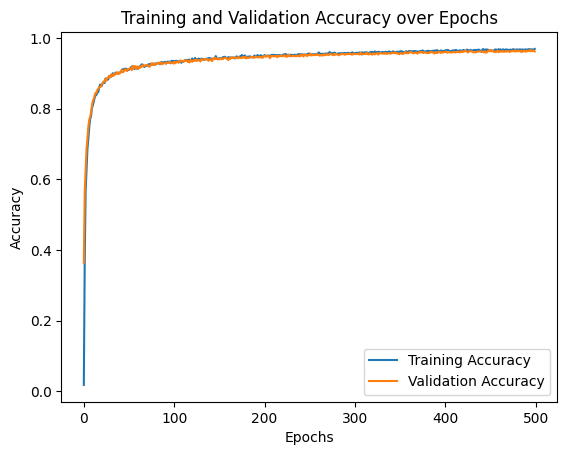

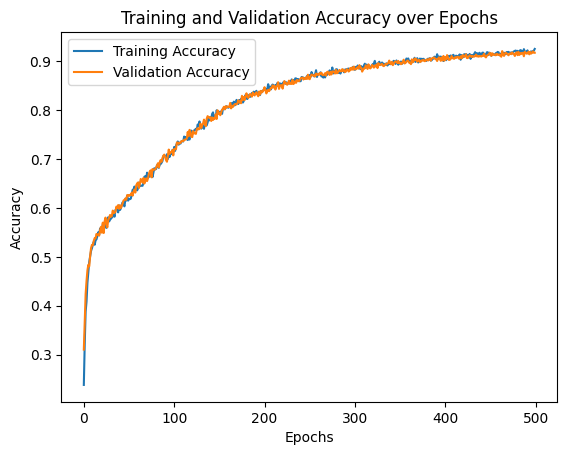

In [ ]:
# Plot the accuracies for both configurations
plot_accuracies(train_accuracies_1, val_accuracies_1)
plot_accuracies(train_accuracies_2, val_accuracies_2)

# **Calculating Accuracy using Sklearn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Function to load MNIST data from an HDF5 file
def load_mnist(filepath="/content/MNIST_Subset.h5"):
    with h5py.File(filepath, 'r') as f:
        X = f['X'][:]
        Y = f['Y'][:]
    return X, Y

# Function to plot training and validation accuracies over epochs
def plot_accuracies(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy over Epochs')
    plt.show()

# Function to train an MLPClassifier with tracking of accuracies
def train_sklearn_with_tracking(X_train, y_train, X_val, y_val, layer_sizes, max_iter=200):
    # Initialize the MLPClassifier with specified layer sizes and other parameters
    clf = MLPClassifier(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam', max_iter=100, warm_start=True, random_state=10)
    train_accuracies = []
    val_accuracies = []

    # Train the classifier for a specified number of epochs
    for epoch in range(max_iter):
        clf.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        val_accuracy = accuracy_score(y_val, clf.predict(X_val))
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    return clf, train_accuracies, val_accuracies

# Load data from the specified file path
file_path = '/content/MNIST_Subset.h5'
X, Y = load_mnist(file_path)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=10)

# Define layer sizes for different neural networks
layer_sizes_1 = (100,)
layer_sizes_2 = (100, 50, 50)

# Train the network with 1 hidden layer and track accuracies
print(f"Accuracy for 1 hidden layer with Sklearn:")
# Reshape X_train and X_val to 2D arrays
clf_1, train_accuracies_1, val_accuracies_1 = train_sklearn_with_tracking(X_train.reshape(X_train.shape[0], -1), y_train, X_val.reshape(X_val.shape[0], -1), y_val, layer_sizes_1)

# Train the network with 3 hidden layers and track accuracies
print(f"Accuracy for 3 hidden layers with Sklearn:")
clf_2, train_accuracies_2, val_accuracies_2 = train_sklearn_with_tracking(X_train.reshape(X_train.shape[0], -1), y_train, X_val.reshape(X_val.shape[0], -1), y_val, layer_sizes_2)

Accuracy for 1 hidden layer with Sklearn:
Epoch 0, Training Accuracy: 1.0, Validation Accuracy: 0.9862475442043221
Epoch 10, Training Accuracy: 0.9973333333333333, Validation Accuracy: 0.9865282065674993
Epoch 20, Training Accuracy: 0.9953684210526316, Validation Accuracy: 0.9831602582093741
Epoch 30, Training Accuracy: 0.992561403508772, Validation Accuracy: 0.9789503227617177
Epoch 40, Training Accuracy: 0.9949473684210526, Validation Accuracy: 0.9803536345776032
Epoch 50, Training Accuracy: 0.991719298245614, Validation Accuracy: 0.976985686219478
Epoch 60, Training Accuracy: 0.9977543859649123, Validation Accuracy: 0.9866685377490878
Epoch 70, Training Accuracy: 0.9928421052631579, Validation Accuracy: 0.9795116474880718
Epoch 80, Training Accuracy: 0.9985964912280701, Validation Accuracy: 0.985686219477968
Epoch 90, Training Accuracy: 0.9974736842105263, Validation Accuracy: 0.9844232388436711
Epoch 100, Training Accuracy: 0.999578947368421, Validation Accuracy: 0.9890541678360932

# **Graph Plot of Accuracy by Sklearn**

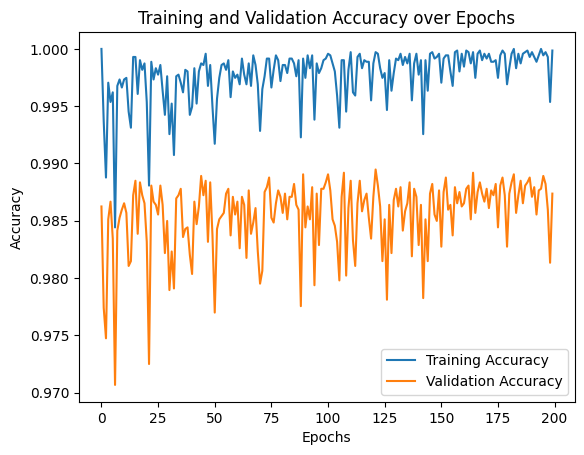

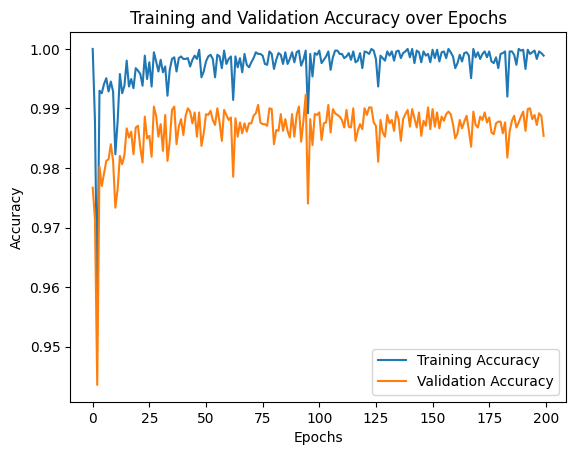

In [ ]:
# Plot the accuracies for both neural networks
plot_accuracies(train_accuracies_1, val_accuracies_1)
plot_accuracies(train_accuracies_2, val_accuracies_2)